# Assignment on Featurization and Model Tuning - Predicting and Modelling the Compressive Strength of Concrete

**Data Description:** The actual concrete compressive strength (MPa) for a given mixture under a  specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations). 

**Domain:** Cement manufacturing

**Attribute Information:**
* Cement           : measured in  kg in a m3 mixture  
* Blast            : measured in  kg in a m3 mixture  
* Fly ash          : measured in  kg in a m3 mixture  
* Water            : measured in  kg in a m3 mixture  
* Superplasticizer : measured in  kg in a m3 mixture  
* Coarse Aggregate : measured in  kg in a m3 mixture  
* Fine Aggregate   : measured in  kg in a m3 mixture  
* Age              : day (1~365)  
* Concrete compressive strength measured in MPa 

**Objective:** Modeling of strength of high performance concrete using Machine Learning 

**Learning Outcome:**
* Exploratory Data Analysis  
* Building ML models for regression  
* Hyper parameter tuning 
 

**Steps and Tasks:**
**1. Deliverable -1 (Exploratory data quality report reflecting the following) (20 marks)**
    a. Univariate analysis (5 marks) 
       *Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers 
    b. Multivariate analysis (5 marks) 
       *Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes 
    c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation  (10 marks) 

**2. Deliverable -2 (Feature Engineering techniques) (15 marks)**
    a. Identify opportunities (if any) to create a composite feature, drop a feature 
    b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help  
    c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength 
    
**3. Deliverable -3  (create the model ) ( 15 marks)**
    a. Obtain feature importance for the individual features and present your findings  
    
**4. Deliverable -4 (Tuning the model) (20 marks)**
    a. Algorithms that you think will be suitable for this project 
    b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit 
    c. Model performance range at 95% confidence level

## 1. Exploratory Data Analysis

**Import the Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline

from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from scipy import stats
from scipy.stats import zscore

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
#Load the Dataset into a Dataframe

concrete_df=pd.read_csv('concrete.csv')

In [3]:
#display the first 5 rows of dataframe
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Basic EDA

In [4]:
#Check the shape of the data
concrete_df.shape

(1030, 9)

In [5]:
#Get the information on attributes
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Observation:**
* It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric.

In [6]:
#Get the datatypes of the attributes
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
#display in each column how many null values are there
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**Observation:** There are no null values in the data.

In [8]:
#display 5 point summary of dataframe
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## 1a. Univariate Analysis

In [9]:
# Check for any negative data in numeric variables 

numeric_variables = concrete_df.columns

for col in numeric_variables:
    print(concrete_df[col].value_counts())

425.0    20
362.6    20
251.4    15
446.0    14
310.0    14
         ..
312.9     1
261.9     1
325.6     1
143.8     1
145.4     1
Name: cement, Length: 278, dtype: int64
0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64
0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
119.0      1
134.0      1
95.0       1
130.0      1
129.7      1
Name: ash, Length: 156, dtype: int64
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
165.0      1
237.0      1
166.7      1
191.3      1
184.4      1
Name: water, Length: 195, dtype: int64
0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
2.2       1
11.5      1
6.3       1
10.5      1
9.8       1
Name: superplastic, Length: 111, dtype: int64
932.0     57
852.1     45
944.7     30
968.0     29
1125.0    24
          ..
909.7      1
925.3      1
845

In [10]:
#Range of Values

for col in numeric_variables:
    print('Range of values for '+col+': ', concrete_df[col].max()-concrete_df[col].min())

Range of values for cement:  438.0
Range of values for slag:  359.4
Range of values for ash:  200.1
Range of values for water:  125.2
Range of values for superplastic:  32.2
Range of values for coarseagg:  344.0
Range of values for fineagg:  398.6
Range of values for age:  364
Range of values for strength:  80.27


In [11]:
# Central Values

for col in numeric_variables:
    print(col)
    print('Minimum       : ', concrete_df[col].min())
    print('Maximum       : ', concrete_df[col].max())
    print('Mean          : ', concrete_df[col].mean())
    print('Median        : ', concrete_df[col].median())
    print('Std Deviation : ', concrete_df[col].std())
    print()

cement
Minimum       :  102.0
Maximum       :  540.0
Mean          :  281.1678640776698
Median        :  272.9
Std Deviation :  104.50636449481536

slag
Minimum       :  0.0
Maximum       :  359.4
Mean          :  73.89582524271844
Median        :  22.0
Std Deviation :  86.2793417481054

ash
Minimum       :  0.0
Maximum       :  200.1
Mean          :  54.188349514563086
Median        :  0.0
Std Deviation :  63.99700415268794

water
Minimum       :  121.8
Maximum       :  247.0
Mean          :  181.56728155339798
Median        :  185.0
Std Deviation :  21.35421856503245

superplastic
Minimum       :  0.0
Maximum       :  32.2
Mean          :  6.204660194174756
Median        :  6.4
Std Deviation :  5.973841392485508

coarseagg
Minimum       :  801.0
Maximum       :  1145.0
Mean          :  972.918932038835
Median        :  968.0
Std Deviation :  77.75395396672087

fineagg
Minimum       :  594.0
Maximum       :  992.6
Mean          :  773.5804854368932
Median        :  779.5
Std Deviation

In [12]:
#Quartiles, Outlier Detection using Inter Quartile Range

# IQR=Q3-Q1
#lower outlier = Q1-1.5*IQR
#Upper outlier = Q3+1.5*IQR

for col in numeric_variables:
    print(col)
    Q1=concrete_df[col].quantile(q=0.25)
    Q3=concrete_df[col].quantile(q=0.75)
    print('1st Quartile (Q1) of '+col+ ' is: ', Q1)
    print('3rd Quartile (Q3) of '+col+ ' is: ', Q3)
    print('Interquartile range (IQR) of '+col+ ' is ', stats.iqr(concrete_df[col]))
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in '+col+': ', L_outliers)
    print('Upper outliers in '+col+': ', U_outliers)
    print('Number of upper outliers in '+col+' : ', concrete_df[concrete_df[col] > U_outliers][col].count())
    print('Number of lower outliers in '+col+' : ', concrete_df[concrete_df[col] < L_outliers][col].count())
    print('% of Upper Outlier in '+col+': ',round(concrete_df[concrete_df[col] > U_outliers][col].count() * 100/len(concrete_df)), '%')
    print('% of Lower Outlier in '+col+': ',round(concrete_df[concrete_df[col] < L_outliers][col].count() * 100/len(concrete_df)), '%')
    print()

cement
1st Quartile (Q1) of cement is:  192.375
3rd Quartile (Q3) of cement is:  350.0
Interquartile range (IQR) of cement is  157.625
Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375
Number of upper outliers in cement :  0
Number of lower outliers in cement :  0
% of Upper Outlier in cement:  0.0 %
% of Lower Outlier in cement:  0.0 %

slag
1st Quartile (Q1) of slag is:  0.0
3rd Quartile (Q3) of slag is:  142.95
Interquartile range (IQR) of slag is  142.95
Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375
Number of upper outliers in slag :  2
Number of lower outliers in slag :  0
% of Upper Outlier in slag:  0.0 %
% of Lower Outlier in slag:  0.0 %

ash
1st Quartile (Q1) of ash is:  0.0
3rd Quartile (Q3) of ash is:  118.3
Interquartile range (IQR) of ash is  118.3
Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75
Number of upper outliers in ash :  0
Number of lower outliers in ash :  0
% of Upper Outlier in ash:  0.0 %
% 

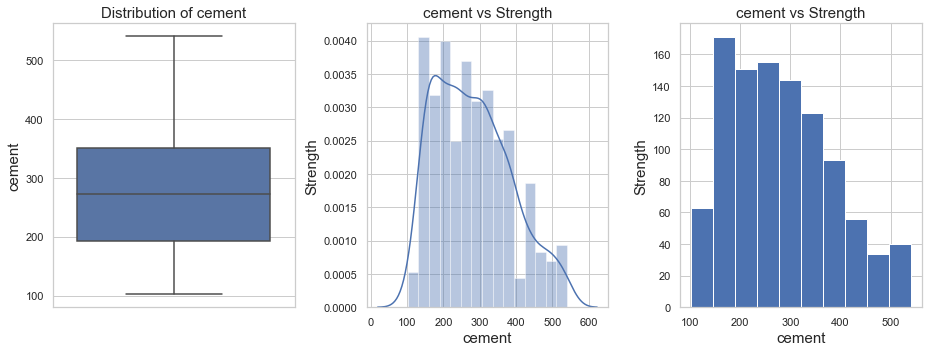

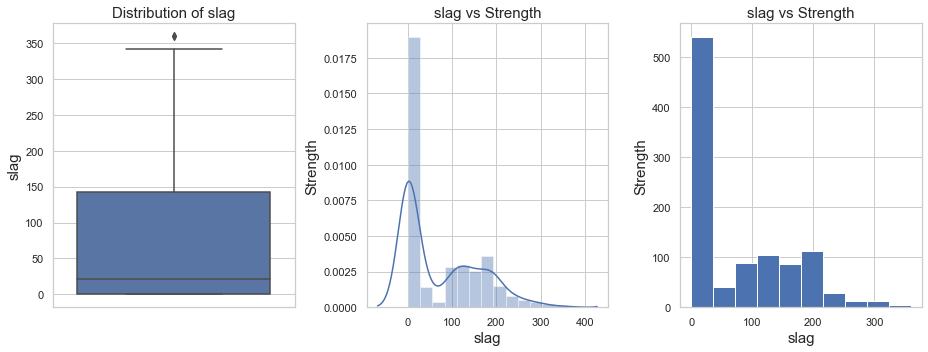

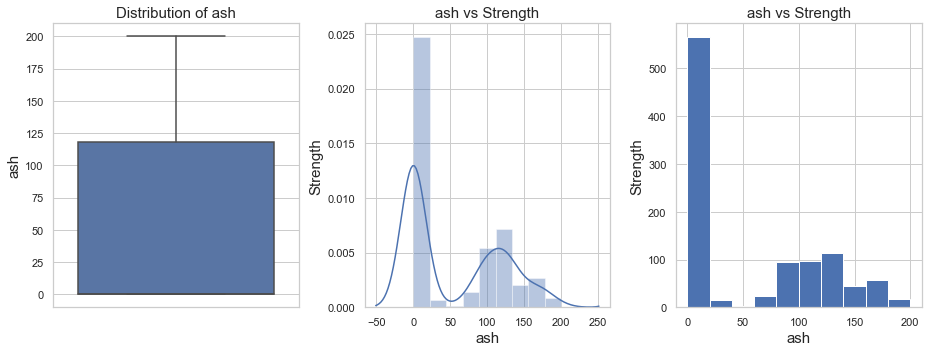

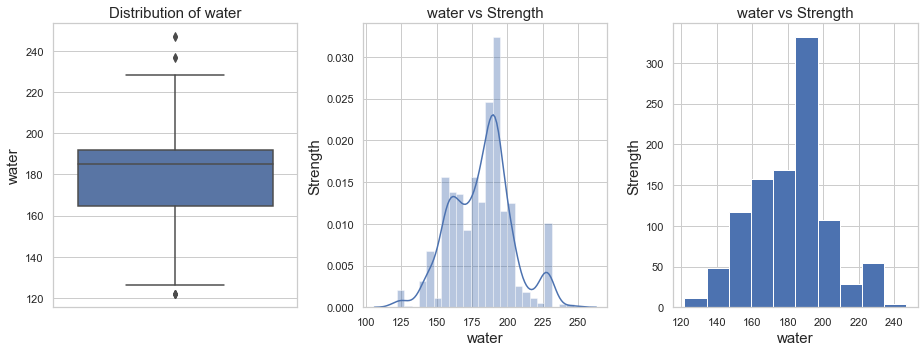

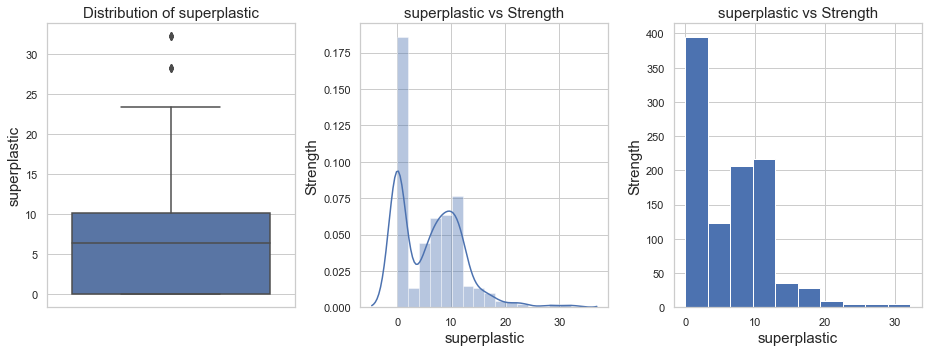

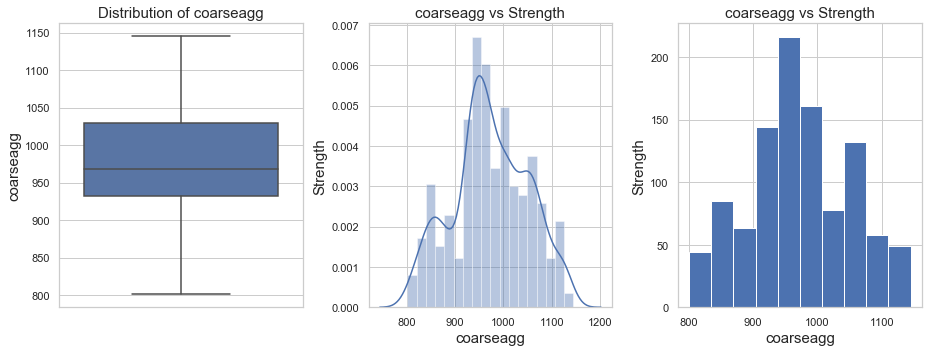

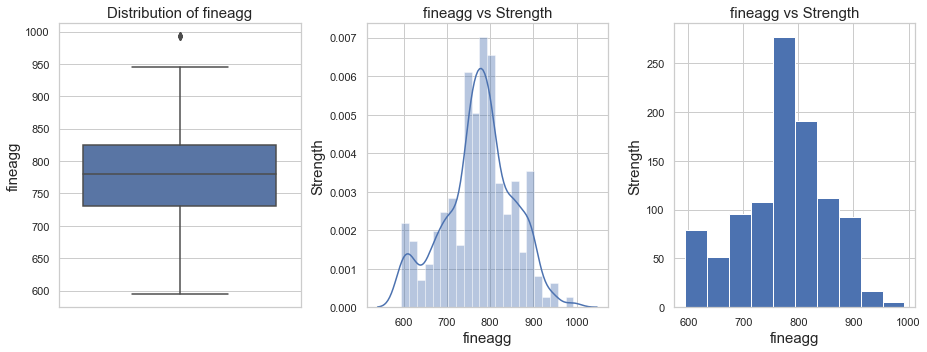

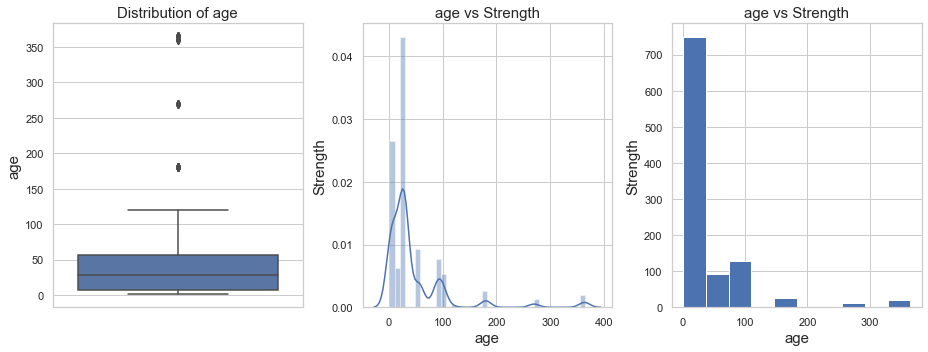

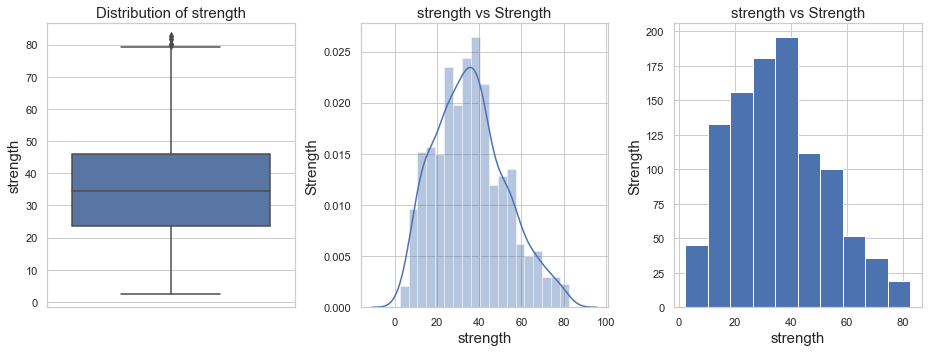

In [13]:
# Plot box plot, distribution plot, histogram for all attributes

for col in numeric_variables:
    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
    sns.boxplot(x=col,data=concrete_df,orient='v',ax=ax1)
    ax1.set_ylabel(col, fontsize=15)
    ax1.set_title('Distribution of '+col, fontsize=15)
    sns.distplot(concrete_df[col],ax=ax2)
    ax2.set_xlabel(col, fontsize=15)
    ax2.set_ylabel('Strength', fontsize=15)
    ax2.set_title( col+' vs Strength', fontsize=15)
    ax3.hist(concrete_df[col])
    ax3.set_xlabel(col, fontsize=15)
    ax3.set_ylabel('Strength', fontsize=15)
    ax3.set_title(col+' vs Strength', fontsize=15)
    plt.tight_layout()

**Observation:**

## 1b. Multivariate Analysis

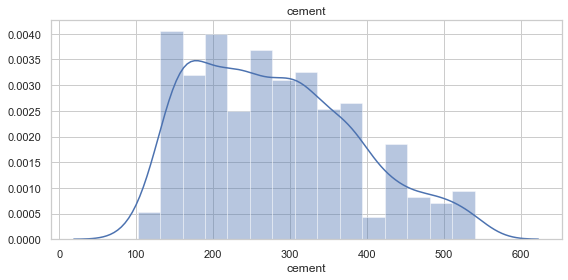

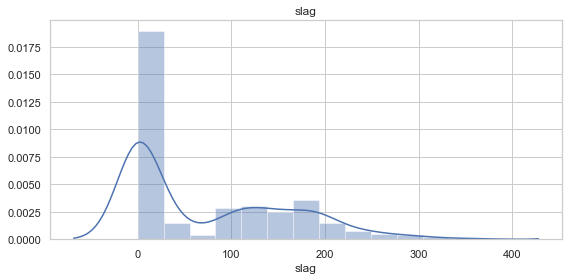

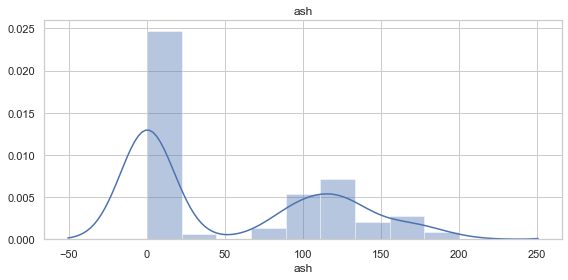

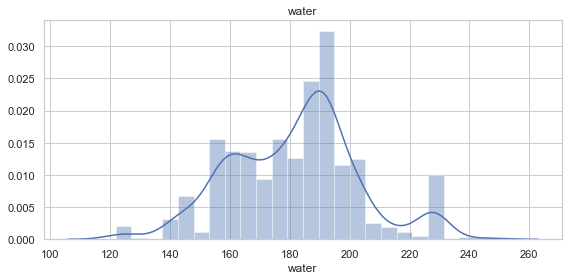

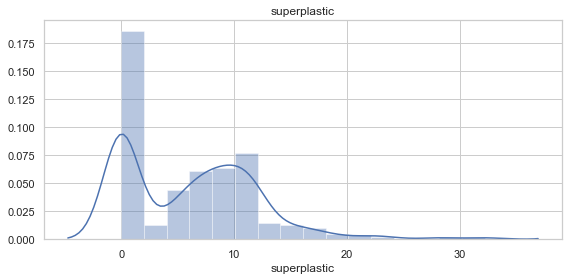

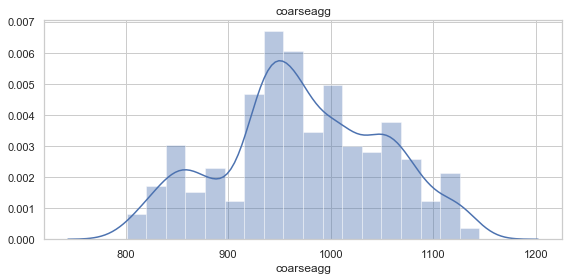

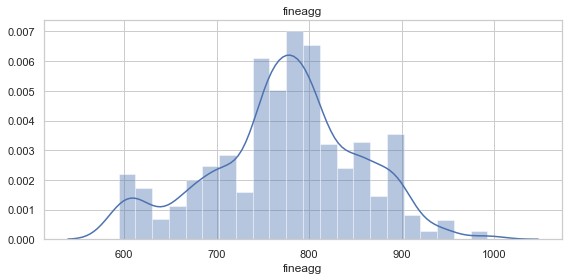

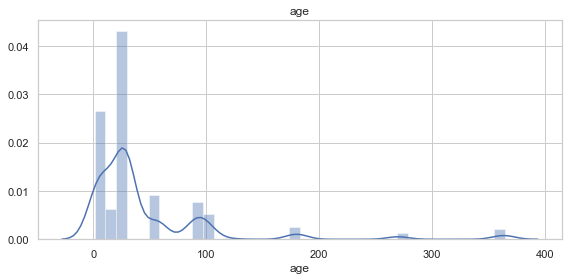

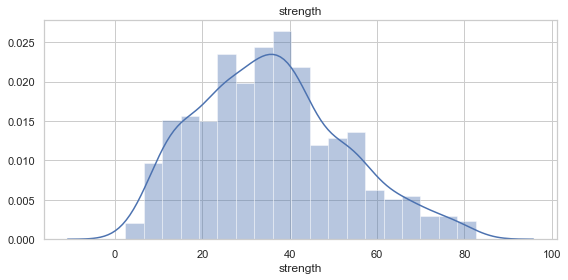

In [14]:
# Distribution Plot

for col in numeric_variables:
    plt.figure(figsize=(8,4))
    sns.distplot(concrete_df[col])
    plt.title(col)
    plt.tight_layout()

**Observation:** 

We can see observe that :

1. Distribution of cement is almost normal.
2. Distribution of slag has three gausssians and rightly skewed.
3. Distribution of ash has two gaussians and rightly skewed.
4. Distribution of water has three guassians and slighly left skewed.
5. Distribution of superplastic has two gaussians and rightly skewed.
6. Distribution of coarseagg has three guassians and almost normal.
7. Distribution of fineagg has almost two guassians and looks like normal.
8. Distribution of age has multiple guassians and rightly skewed.

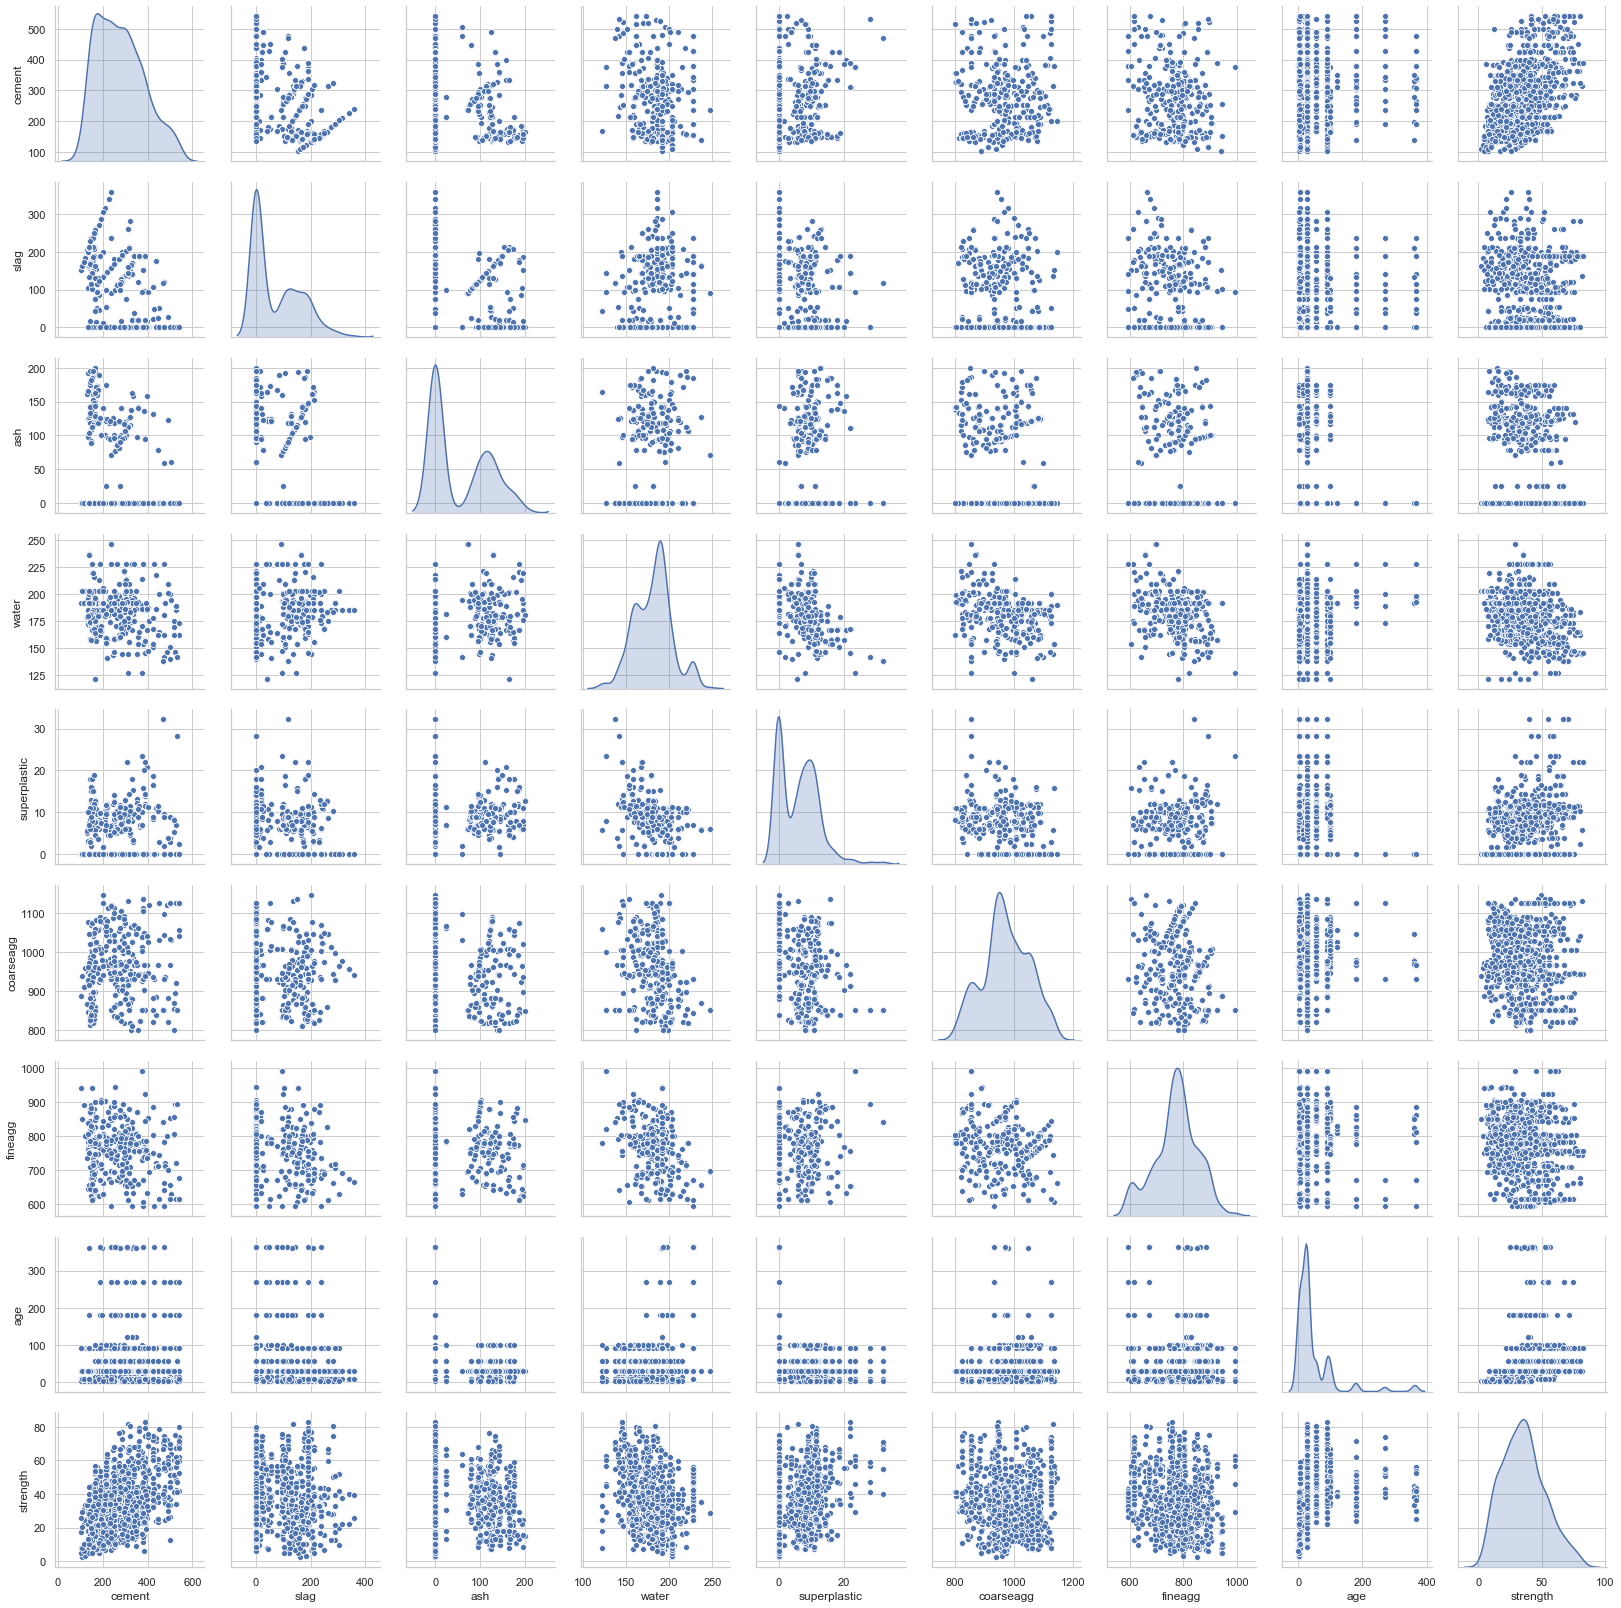

In [15]:
## pairplot- plot density curve instead of histogram in diagonal

sns.pairplot(concrete_df, diag_kind= 'kde')

**Observation:**
The diagonal gives the same information, we got using distplot.
1. cement attribute have almost normal curve.
2. slag has two gausssians and rightly skewed.It shows the presence of outlies.
3. ash has two gaussians and rightly skewed.It shows the presence of outlies.
4. water has atleast guassians and slighly left skewed.It shows the presence of outlies.
5. superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
6. coarseagg has three guassians and almost normal.
7. fineagg has almost two guassians and looks like normal.
8. age has multiple guassians and rightly skewed. It shows the presence of outlies.
9. strength is close to a normal curve.
10. We not only have missing values problem but also outliers problem in the dataset.

**Relationship between indpendent attributes:**

Scatter plots

1. **cement vs other independent attributes:** This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
2. **slag vs other independent attributes:** This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
3. **ash vs other independent attributes:** This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
4. **water vs other independent attributes:** This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
5. **superplastic vs other independent attributes:** This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
6. **coarseagg vs other independent attributes:** This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
7. **fineagg vs other independent attributes:** It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

**Relationship between dependent and independent attributes - strength attribute :**

**strength:** This is the target variable

1. **strength vs cement:** It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor. 
2. **strength vs slag:** There is no particular trend. 
3. **strength vs ash:** There is also no particular trend. 
4. **strength vs age:** For a given value of age, we have different values of strength. Hence, It is not a good predictor. 5. **strength vs superplastic:** For a given value of age, we have different values of strength. Hence, It is not a good predictor. 

Other attributes does not give any strong relationship with strength. Hence, we can see that **none of the independent attributes are a good predictors of the strength attribute.** 
There is a **no linear relationship between them. So, we will not use Linear model.**

In [16]:
# correlation matrix 
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


**Observation:** This shows the correlation between all attributes.

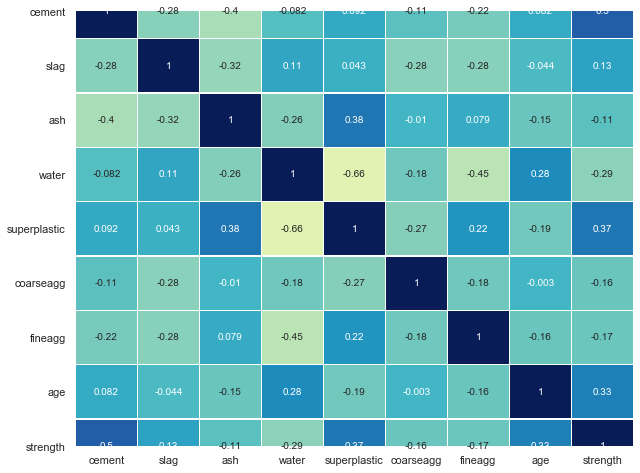

In [17]:
# heat map
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, linewidths=.5, center=0, cbar=False, cmap="YlGnBu")

**Observation:**

1. It is also giving the same information we observed in pairplot analysis.
2. water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.
3. stength has a weak positive relationship with superplastic, age and cement. 
4. There are no significant strong relationships founds. All are either negative or weak positive correlation.

## 1c. Handling missing values and outliers

In [18]:
# Check if there are any null values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**Observation:** There are no null values in the data.

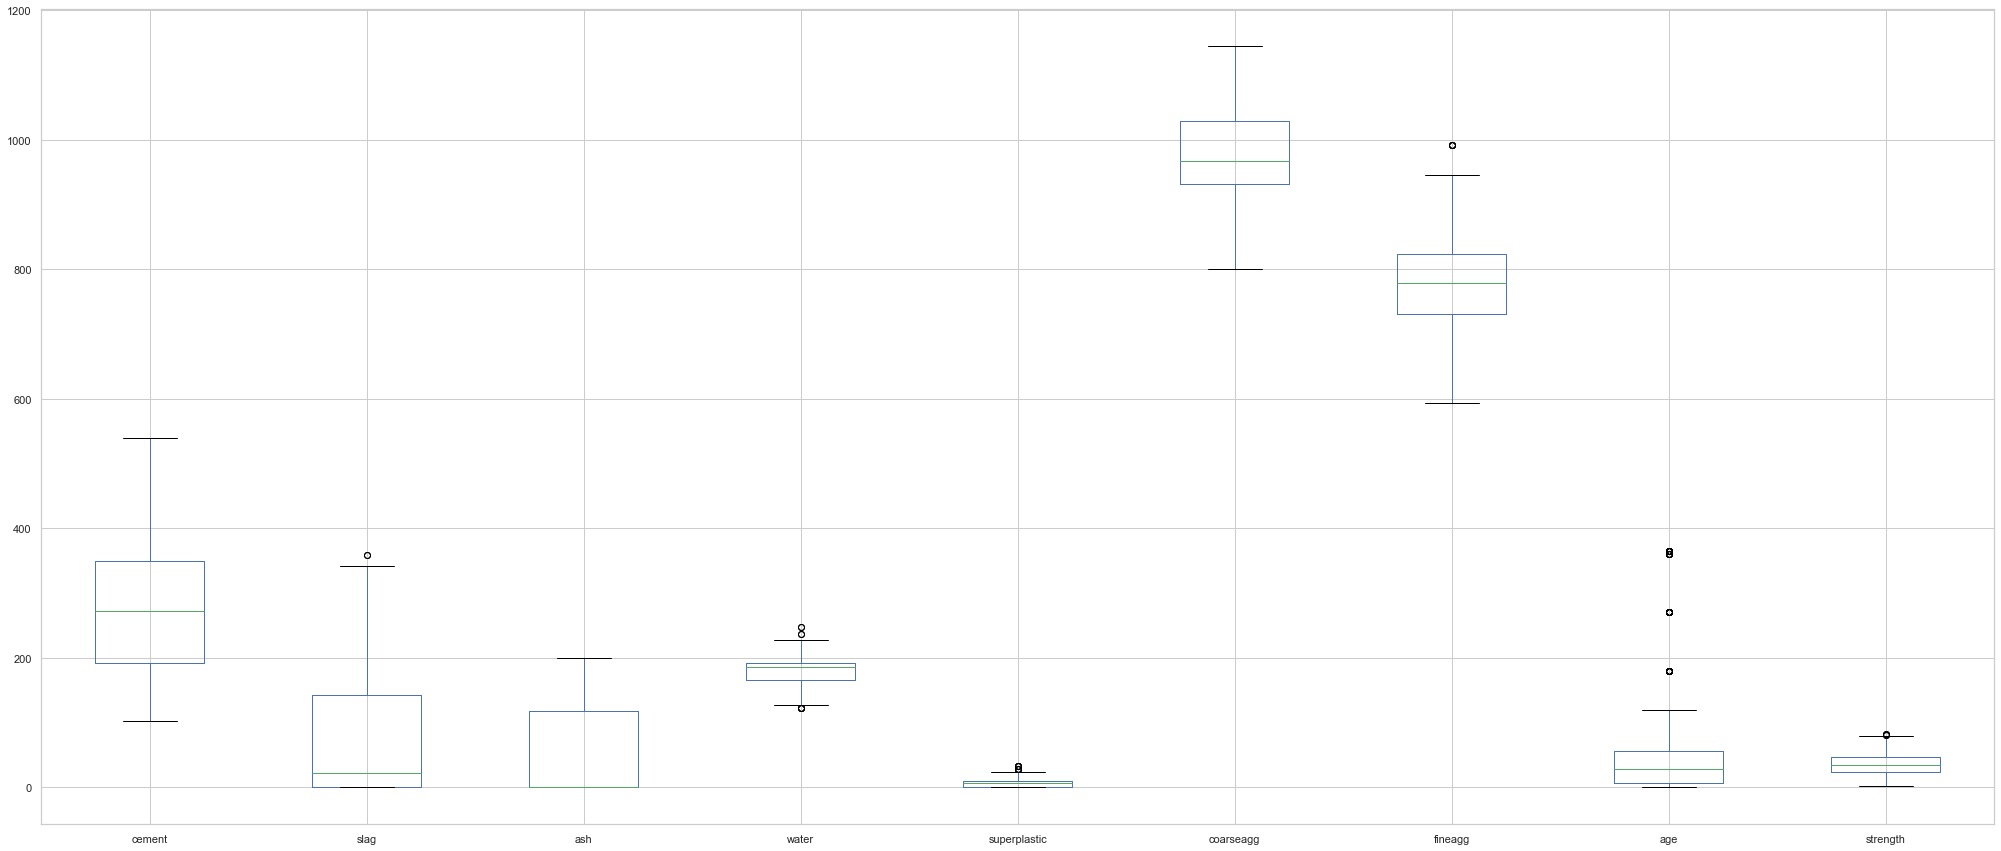

In [19]:
#Checking for outliers
concrete_df1=concrete_df.copy()
concrete_df1.boxplot(figsize=(35,15))

**Observation:** It also shows that slag, water superplastic, fineagg and age contains outliers.

**Outlier Detection using IQR Method:**

In [20]:
# IQR=Q3-Q1
#lower outlier = Q1-1.5*IQR
#Upper outlier = Q3+1.5*IQR

for col in numeric_variables:
    print(col)
    Q1=concrete_df[col].quantile(q=0.25)
    Q3=concrete_df[col].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in '+col+': ', L_outliers)
    print('Upper outliers in '+col+': ', U_outliers)
    print('Number of upper outliers in '+col+' : ', concrete_df[concrete_df[col] > U_outliers][col].count())
    print('Number of lower outliers in '+col+' : ', concrete_df[concrete_df[col] < L_outliers][col].count())
    print('% of Upper Outlier in '+col+': ',round(concrete_df[concrete_df[col] > U_outliers][col].count() * 100/len(concrete_df)), '%')
    print('% of Lower Outlier in '+col+': ',round(concrete_df[concrete_df[col] < L_outliers][col].count() * 100/len(concrete_df)), '%')
    if (concrete_df[concrete_df[col] > U_outliers][col].count() > 0):
        print('Records containing upper outliers in '+col+': \n',concrete_df[(concrete_df[col] > U_outliers)][col])
    if (concrete_df[concrete_df[col] < L_outliers][col].count() > 0):
        print('Records containing lower outliers in '+col+': \n',concrete_df[(concrete_df[col] < L_outliers)][col])
    print()

cement
Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375
Number of upper outliers in cement :  0
Number of lower outliers in cement :  0
% of Upper Outlier in cement:  0.0 %
% of Lower Outlier in cement:  0.0 %

slag
Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375
Number of upper outliers in slag :  2
Number of lower outliers in slag :  0
% of Upper Outlier in slag:  0.0 %
% of Lower Outlier in slag:  0.0 %
Records containing upper outliers in slag: 
 918    359.4
990    359.4
Name: slag, dtype: float64

ash
Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75
Number of upper outliers in ash :  0
Number of lower outliers in ash :  0
% of Upper Outlier in ash:  0.0 %
% of Lower Outlier in ash:  0.0 %

water
Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998
Number of upper outliers in water :  4
Number of lower outliers in water :  5
% of Upper Outlier in water:  0.0 %
% of Lower Outlier

**Observation:** By using the IQR method, we were able to detect the records that have outliers. Now let's try the same using z-score or standard deviation method.

**Outlier Detection using z-score Method:**

In [21]:
#z-score method

#z = (x-μ) / σ

for col in numeric_variables:
    print(col)
    threshold = 3
    mean_col = concrete_df[col].mean()
    sd_col = concrete_df[col].std()
    z_score_col = ((concrete_df[col] - mean_col) / sd_col).abs()
    print('Number of outliers in '+col+' :', concrete_df[z_score_col > threshold][col].count())
    print('Records containing outliers in '+col+': \n',concrete_df[z_score_col > threshold][col])
    print()

cement
Number of outliers in cement : 0
Records containing outliers in cement: 
 Series([], Name: cement, dtype: float64)

slag
Number of outliers in slag : 4
Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64

ash
Number of outliers in ash : 0
Records containing outliers in ash: 
 Series([], Name: ash, dtype: float64)

water
Number of outliers in water : 2
Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64

superplastic
Number of outliers in superplastic : 10
Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64

coarseagg
Number of outliers in coarseagg : 0
Records containing outliers in coarseagg: 
 Series([], Name: coarseagg, dtype: float64)

fineagg
Number of outliers in fineagg : 0
Records containing outliers in fine

**Observation:** 

1. Here, we have used Standard deviation/z-score method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
2. We can see that slag, water, superplastic and age contain outliers.

**Observation:** IQR method is better in detecting the outliers than the z-score method. So we would be processing the outliers that were identified by IQR method.

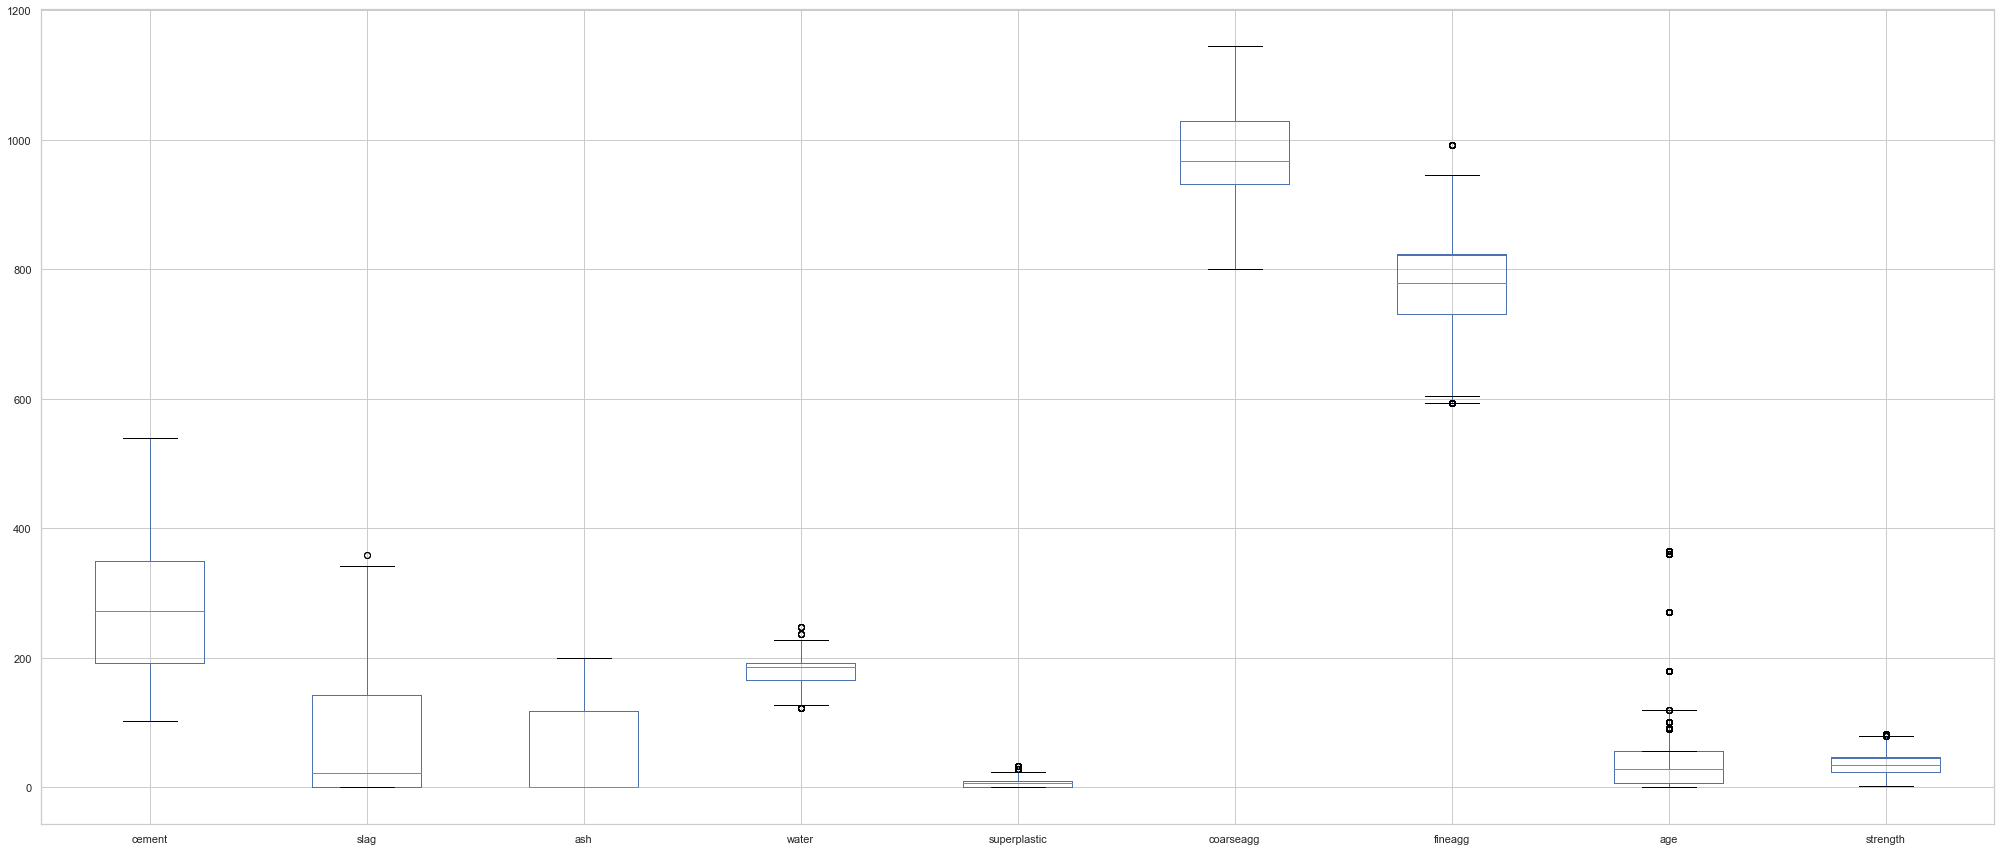

In [22]:
# Handling the outliers

for col in numeric_variables:
    Q1=concrete_df1[col].quantile(q=0.25)
    Q3=concrete_df1[col].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    concrete_df1.loc[(concrete_df1[col] < L_outliers) | (concrete_df1[col] > U_outliers), col] = concrete_df1[col].median()
    
    concrete_df1.boxplot(figsize=(35,15))

## 2. Feature Engineering
Various steps involved are - 
* Split into train, test data
* Scaling the data
* Identify clusters of data
* Check if polynomial features could be used
* Feature selection

Once these are performed, the model selection, tuning, and fitting would be performed followed by model evaluation.

### Split into train, test data set

In [23]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X = concrete_df1.iloc[:,0:8]
y = concrete_df1.iloc[:,8]

### Scale the features

In [24]:
#Scaling the features

concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df1.columns)

#independent and dependent variables
X_scaled = concrete_df_z.iloc[:,0:8]
y_scaled = concrete_df_z.iloc[:,8]

In [25]:
# Split X and y into train and test set in 70:30 ratio.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, shuffle = True, test_size = 0.3,  random_state = 1)

X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,0.658961,-0.858192,-0.847144,1.036599,-1.091166,0.013910,0.031195,-0.656933
286,0.888723,1.358745,-0.847144,-0.561016,0.753750,-0.602435,-0.201437,2.113827
600,-0.039901,-0.858192,-0.847144,0.453882,-1.091166,-0.063294,1.060878,-1.052756
691,0.946164,0.254963,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.908821
474,0.716401,-0.858192,1.372788,0.551002,0.918148,-2.212138,0.069332,-0.153159


In [26]:
# print proportions
print('train: {}% | test {}%'.format(round(len(y_train)/len(y),2), round(len(y_test)/len(y),2)))                                                     

train: 0.7% | test 0.3%


### K-Means Clustering

In [27]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7560.924257
2,3,6372.616362
3,4,5583.534456
4,5,5111.684775
5,6,4654.104481
6,7,4239.004816
7,8,3966.556942
8,9,3741.626288
9,10,3594.809715


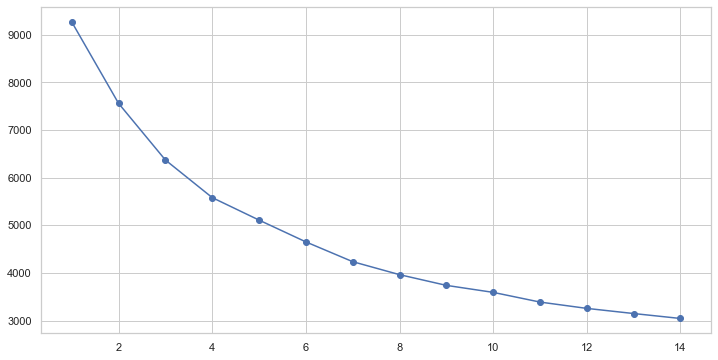

In [28]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [29]:
# The elbow plot confirms our visual analysis that there are likely 6 good clusters

In [30]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [31]:
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

concrete_df_z_copy = concrete_df_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [32]:
centroids = cluster.cluster_centers_
centroids

array([[-0.59937784, -0.65142118,  1.09964638, -0.6176084 ,  0.48980244,
         0.62857181,  0.43216145,  0.27343116, -0.12605106],
       [ 1.42968733, -0.43116456, -0.69660733,  1.29402011, -1.00250124,
         0.18767725, -1.65637577,  0.15492823,  0.68964544],
       [-0.8380289 ,  1.40082   , -0.83833896,  0.58047263, -0.71176847,
        -0.02083133, -0.18656202, -0.17487309, -0.54801117],
       [ 1.02203982,  0.47620962, -0.50476581, -1.03282385,  1.04210635,
        -0.62820372,  0.19271416,  0.07929349,  1.20149129],
       [-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27121637],
       [ 0.33130678, -0.85674418, -0.78652529,  0.45219107, -1.01953628,
         0.4918378 ,  0.4105953 , -0.23543647, -0.67822392]])

In [34]:
centroid_df1 = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.599378,-0.651421,1.099646,-0.617608,0.489802,0.628572,0.432161,0.273431,-0.126051
1,1.429687,-0.431165,-0.696607,1.294020,-1.002501,0.187677,-1.656376,0.154928,0.689645
2,-0.838029,1.400820,-0.838339,0.580473,-0.711768,-0.020831,-0.186562,-0.174873,-0.548011
3,1.022040,0.476210,-0.504766,-1.032824,1.042106,-0.628204,0.192714,0.079293,1.201491
4,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.271216
5,0.331307,-0.856744,-0.786525,0.452191,-1.019536,0.491838,0.410595,-0.235436,-0.678224


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AA95E4C48>,
      dtype=object)

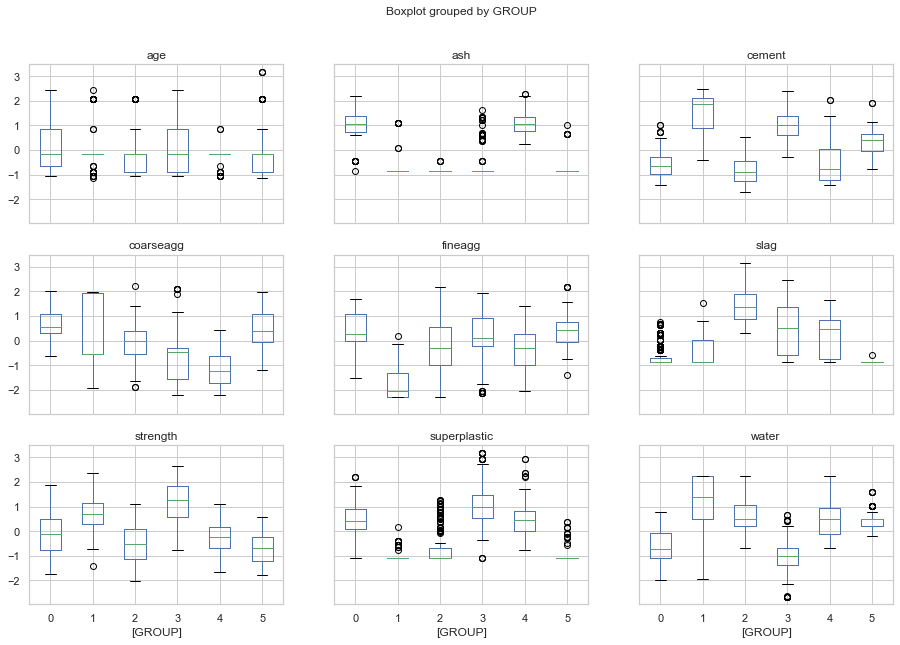

In [35]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

**Observation:**

1. No distinct clusters are visible at any number of clusters. 
2. Here, None of the dimensions are good predictor of target variable.
3. So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

### Polynomial Regression

In [36]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree, interaction_only=True)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  print("The model performance for the training set with degree = ", degree)
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print()

In [37]:
for i in range(1,10):
    create_polynomial_regression_model(i)


The model performance for the training set with degree =  1
-------------------------------------------
RMSE of training set is 0.5255171403791632
R2 score of training set is 0.7179307051307557

The model performance for the training set with degree =  2
-------------------------------------------
RMSE of training set is 0.46889066713135075
R2 score of training set is 0.775443712989279

The model performance for the training set with degree =  3
-------------------------------------------
RMSE of training set is 0.42395659220068094
R2 score of training set is 0.8164202277243655

The model performance for the training set with degree =  4
-------------------------------------------
RMSE of training set is 0.39707822416215044
R2 score of training set is 0.8389598436748558

The model performance for the training set with degree =  5
-------------------------------------------
RMSE of training set is 0.37855903323729906
R2 score of training set is 0.8536309448720413

The model performance 

**Observation:** From the above result, we can see that the accuracy is reducing after 5th degree. We will use these features in our models and check the performance.

### Feature Selection using scaled data

In [38]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [39]:
colnames = X_train.columns.tolist()

# Filter Method - f_regression
f_selector = SelectKBest(f_regression, k = 8)
f_selector.fit(X_train, y_train)
f_support = f_selector.get_support()
ranks["f-reg"] = ranking(np.abs(f_selector.scores_), colnames)
print(str(len(colnames)),'Selected Features')

#Linear Regression Method
lr_selector = LinearRegression(normalize=True)
lr_selector.fit(X_train, y_train)
ranks["Linear Reg"] = ranking(np.abs(lr_selector.coef_), colnames)
print(str(len(colnames)),'Selected Features')

#Wrapper Method - Recursive Feature Elimination
rfe_selector = RFE(estimator=LinearRegression(),n_features_to_select=6, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
ranks["RFE"] = ranking(list(map(float, rfe_selector.ranking_)), colnames, order=-1)
print(str(len(colnames)),'Selected Features')

#Embedded Method - Lasso
ls_selector = SelectFromModel(Lasso(alpha=0.05),max_features=8)
ls_selector.fit(X_train, y_train)
ls_support = ls_selector.get_support()
ranks["Lasso"] = ranking(np.abs(ls_selector.estimator_.coef_), colnames)
print(str(len(colnames)),'Selected Features')

#Embedded Method - Ridge
rd_selector = Ridge(alpha=7)
rd_selector.fit(X_train, y_train)
ranks["Ridge"] = ranking(np.abs(rd_selector.coef_), colnames)
print(str(len(colnames)),'Selected Features')

#Embedded Method - Tree Based Random Forest
rf_selector = RandomForestRegressor(n_estimators=100)
rf_selector.fit(X_train, y_train)
ranks["Random Forest"] = ranking(rf_selector.feature_importances_, colnames)
print(str(len(colnames)),'Selected Features')

8 Selected Features
8 Selected Features
Fitting estimator with 8 features.
8 Selected Features
8 Selected Features
8 Selected Features
8 Selected Features


In [40]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

result = pd.DataFrame(ranks)
print(result.sort_values(["Mean"],ascending=False))


              f-reg  Linear Reg  RFE  Lasso  Ridge  Random Forest  Mean
cement         0.98        1.00  1.0   1.00   1.00           1.00  1.00
age            1.00        0.82  1.0   0.90   0.87           0.97  0.93
slag           0.00        0.47  1.0   0.41   0.42           0.19  0.42
water          0.23        0.25  1.0   0.18   0.27           0.29  0.37
superplastic   0.33        0.13  1.0   0.38   0.10           0.11  0.34
ash            0.03        0.14  1.0   0.00   0.05           0.00  0.20
coarseagg      0.06        0.01  0.0   0.00   0.00           0.04  0.02
fineagg        0.01        0.00  0.0   0.00   0.01           0.05  0.01


C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


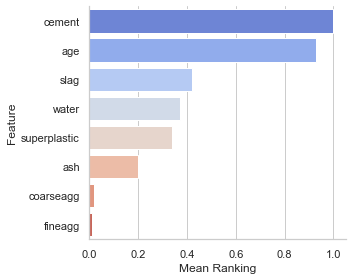

In [41]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=4, aspect=1.25, palette='coolwarm')

**Observation:** Based on the above result, we can see that the top features with higher mean value are - **superplastic, cement, age, water, slag followed by ash**. These features would be considered for building models.

With **linear correlation (f-regression)**, each feature is evaluated independently. It’s also clear that while the method is able to measure the linear relationship between each feature and the response variable, it is not optimal for selecting the top performing features for improving the generalization of a model, since all top performing features would essentially be picked twice.

**Lasso** picks out the top performing features, while forcing other features to be close to zero. It is clearly useful when reducing the number of features is required, but not necessarily for data interpretation. 

**Random forest’s** impurity based ranking is typically aggressive in the sense that there is a sharp drop-off of scores after the first few top ones. This can be seen from the example where the third ranked feature has already 4x smaller score than the top feature (whereas for the other ranking methods, the drop-off is clearly not that aggressive).

For **recursive feature elimination**, the top five feature will all get score 1, with the rest of the ranks spaced equally between 0 and 1 according to their rank.

**Ridge regression** forces regressions coefficients to spread out similarly between correlated variables. 

## 3. Pipelines for Model Selection

In [42]:
# Have only top 6 features for further model building, tuning as per feature selection

X_new = concrete_df_z.drop(['fineagg','coarseagg','strength'],axis=1)
y_new = concrete_df_z['strength']

In [43]:
#Split into train and test data
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, y_new, shuffle=True, test_size=0.30, random_state=1)

**Build Pipelines using standard scaler**

In [44]:
pipelines = []
pipelines.append(('Linear Regression', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('LR',LinearRegression())])))
pipelines.append(('Lasso', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('LASSO', Lasso())])))
pipelines.append(('SVM', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('SVR', SVR())])))
pipelines.append(('KNN', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('KNN', KNeighborsRegressor())])))
pipelines.append(('Decision Tree', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('CART', DecisionTreeRegressor())])))
pipelines.append(('Random Forest', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('RFR', RandomForestRegressor())])))
pipelines.append(('Ada Boost', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('ABR', AdaBoostRegressor())])))
pipelines.append(('Bagging', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('BR', BaggingRegressor())])))
pipelines.append(('Gradient Boosting', 
                  Pipeline([('Scaler', StandardScaler()),
#                            ('PCA', PCA()),
                            ('GBM', GradientBoostingRegressor())])))

results = []
names = []
result_mean = []
result_std = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_new_train, Y_new_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    result_mean.append(cv_results.mean())
    result_std.append(cv_results.std())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

result_final = pd.DataFrame(names)
result_final.columns = ['Model']
result_final['Neg MSE Score'] = result_mean
result_final['Std Dev'] = result_std
print()
print(result_final.sort_values(['Neg MSE Score'],ascending=False))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Linear Regression: -0.281558 (0.035825)
Lasso: -0.981246 (0.099882)
SVM: -0.151802 (0.029510)
KNN: -0.210403 (0.028987)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



Decision Tree: -0.202660 (0.047325)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest: -0.109889 (0.014821)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Ada Boost: -0.226083 (0.029560)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Bagging: -0.130980 (0.018554)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Gradient Boosting: -0.127810 (0.030148)

               Model  Neg MSE Score   Std Dev
5      Random Forest      -0.109889  0.014821
8  Gradient Boosting      -0.127810  0.030148
7            Bagging      -0.130980  0.018554
2                SVM      -0.151802  0.029510
4      Decision Tree      -0.202660  0.047325
3                KNN      -0.210403  0.028987
6          Ada Boost      -0.226083  0.029560
0  Linear Regression      -0.281558  0.035825
1              Lasso      -0.981246  0.099882


**Apply polynomial features of 5th degree and check the cross validation score**

In [45]:
pipelines = []
pipelines.append(('Linear Regression', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('LR',LinearRegression())])))
pipelines.append(('Lasso', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('LASSO', Lasso())])))
pipelines.append(('SVM', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('SVR', SVR())])))
pipelines.append(('KNN', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('KNN', KNeighborsRegressor())])))
pipelines.append(('Decision Tree', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('CART', DecisionTreeRegressor())])))
pipelines.append(('Random Forest', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('RFR', RandomForestRegressor())])))
pipelines.append(('Ada Boost', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('ABR', AdaBoostRegressor())])))
pipelines.append(('Bagging', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('BR', BaggingRegressor())])))
pipelines.append(('Gradient Boosting', 
                  Pipeline([('poly_features', PolynomialFeatures(5, interaction_only=True)),
#                            ('PCA', PCA()),
                            ('GBM', GradientBoostingRegressor())])))

results = []
names = []
result_mean = []
result_std = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_new_train, Y_new_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    result_mean.append(cv_results.mean())
    result_std.append(cv_results.std())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

result_final1 = pd.DataFrame(names)
result_final1.columns = ['Model']
result_final1['Neg MSE Score'] = result_mean
result_final1['Std Dev'] = result_std
print()
print(result_final1.sort_values(['Neg MSE Score'],ascending=False))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Linear Regression: -0.376178 (0.215839)
Lasso: -0.903964 (0.100204)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: -0.222574 (0.032929)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -0.221764 (0.027651)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree: -0.264297 (0.106004)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest: -0.140910 (0.018839)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Ada Boost: -0.230224 (0.041889)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Bagging: -0.152863 (0.022661)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Gradient Boosting: -0.122575 (0.021989)

               Model  Neg MSE Score   Std Dev
8  Gradient Boosting      -0.122575  0.021989
5      Random Forest      -0.140910  0.018839
7            Bagging      -0.152863  0.022661
3                KNN      -0.221764  0.027651
2                SVM      -0.222574  0.032929
6          Ada Boost      -0.230224  0.041889
4      Decision Tree      -0.264297  0.106004
0  Linear Regression      -0.376178  0.215839
1              Lasso      -0.903964  0.100204


**Observation:** The top three models using both scaled data and polynomial features are - **Random Forest Regressor, Gradient Boosting Regressor and Bagging Regressor**.

Let's use Grid SearchCV to fine tune the hyper parameters. 

### Hyperparamter Tuning using GridSearchCV - Random Forest Regressor

In [46]:
scaler = StandardScaler().fit(X_new_train)
rescaledX = scaler.transform(X_new_train)
#param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
param_grid = {'n_estimators': np.array([50,100,200,300,400,500])}

model = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_new_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Get the list of best estimators for Random Forest Regressor
grid.best_estimator_

-0.113804 (0.039777) with: {'n_estimators': 50}
-0.116230 (0.040099) with: {'n_estimators': 100}
-0.111507 (0.039269) with: {'n_estimators': 200}
-0.111373 (0.039893) with: {'n_estimators': 300}
-0.112562 (0.038831) with: {'n_estimators': 400}
-0.112303 (0.040022) with: {'n_estimators': 500}
Best: -0.111373 using {'n_estimators': 300}


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Fitting the RF Model with Best Hyperparameters for scaled data

In [47]:
scaler = StandardScaler().fit(X_new_train)
rescaled_X_train = scaler.transform(X_new_train)
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', 
                              max_depth=None, max_features='auto', max_leaf_nodes=None, 
                              max_samples=None, min_impurity_decrease=0.0,
                              min_impurity_split=None, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              n_estimators=300, n_jobs=None, oob_score=False,
                              random_state=1, verbose=0, warm_start=False)
model.fit(rescaled_X_train, Y_new_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_new_test)
predictions = model.predict(rescaled_X_test)

print("Train Accuracy     : ",np.round(model.score(rescaled_X_train, Y_new_train),4))
print("Test Accuracy      : ",np.round(model.score(rescaled_X_test, Y_new_test),4))
print("Mean Squared Error : ", np.round(mean_squared_error(Y_new_test, predictions),4))

Train Accuracy     :  0.979
Test Accuracy      :  0.8798
Mean Squared Error :  0.1261


### Use polynomial features of 5th degree instead of scaled data

In [48]:
#Obtain polynomial Features
poly_features = PolynomialFeatures(degree=5, interaction_only=True)
rescaled_X_train = poly_features.fit_transform(X_new_train)

#Fit and predict RF model
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', 
                              max_depth=None, max_features='auto', max_leaf_nodes=None, 
                              max_samples=None, min_impurity_decrease=0.0,
                              min_impurity_split=None, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              n_estimators=300, n_jobs=None, oob_score=False,
                              random_state=1, verbose=0, warm_start=False)
model.fit(rescaled_X_train, Y_new_train)

# transform the validation dataset
rescaled_X_test = poly_features.transform(X_new_test)
predictions = model.predict(rescaled_X_test)

print("Train Accuracy     : ",np.round(model.score(rescaled_X_train, Y_new_train),4))
print("Test Accuracy      : ",np.round(model.score(rescaled_X_test, Y_new_test),4))
print("Mean Squared Error : ", np.round(mean_squared_error(Y_new_test, predictions),4))

Train Accuracy     :  0.9764
Test Accuracy      :  0.8659
Mean Squared Error :  0.1406


**Observation:** Though polynomial features did better in k-fold cross validation, the predicted score is less compared to that of the scaled data. So we would be going ahead with scaled data only.

### Compare Actual and Predicted Data

In [49]:
diff = abs(Y_new_test - predictions)

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_new_test, 'Difference' : diff})
compare.head(10)

,Prediction,Test Data,Difference
339,0.236342,0.737921,0.501579
244,0.800570,0.799297,0.001273
882,-0.341756,-0.117685,0.224071
567,-0.733372,-1.054719,0.321348
923,-1.135848,-1.254645,0.118796
358,-0.578967,-0.651223,0.072257
576,0.555398,1.231353,0.675956
27,1.782146,1.796491,0.014345
994,-0.872641,-1.162886,0.290244
563,-0.259669,-0.611724,0.352056


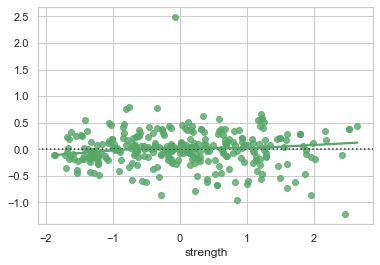

In [50]:
sns.residplot(Y_new_test, predictions, lowess=True, color="g")

### Hyperparamter Tuning using GridSearchCV - Gradient Boosting Regressor

In [51]:
scaler = StandardScaler().fit(X_new_train)
rescaledX = scaler.transform(X_new_train)
#param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
param_grid = {
    "n_estimators":np.array([50,100,200,300,400])
    }
model = GradientBoostingRegressor()
kfold = KFold(n_splits=10, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_new_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Get the list of best estimators for Gradient Boost Regressor
grid.best_estimator_

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


-0.148188 (0.028494) with: {'n_estimators': 50}
-0.128334 (0.031198) with: {'n_estimators': 100}
-0.112565 (0.032928) with: {'n_estimators': 200}
-0.107577 (0.033733) with: {'n_estimators': 300}
-0.103615 (0.032619) with: {'n_estimators': 400}
Best: -0.103615 using {'n_estimators': 400}


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Fitting the GBR Model with Best Hyperparameters for scaled data

In [52]:
scaler = StandardScaler().fit(X_new_train)
rescaled_X_train = scaler.transform(X_new_train)
model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                                  init=None, learning_rate=0.1, loss='ls', max_depth=5,
                                  max_features=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=400,
                                  n_iter_no_change=None, presort='deprecated',
                                  random_state=1, subsample=1.0, tol=0.0001,
                                  validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(rescaled_X_train, Y_new_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_new_test)
predictions = model.predict(rescaled_X_test)

print("Train Accuracy     : ",np.round(model.score(rescaled_X_train, Y_new_train),4))
print("Test Accuracy      : ",np.round(model.score(rescaled_X_test, Y_new_test),4))
print("Mean Squared Error : ", np.round(mean_squared_error(Y_new_test, predictions),4))

Train Accuracy     :  0.9898
Test Accuracy      :  0.8868
Mean Squared Error :  0.1187


### Use polynomial features of 5th degree instead of scaled data

In [53]:
#Obtain polynomial Features
poly_features = PolynomialFeatures(degree=5, interaction_only=True)
rescaled_X_train = poly_features.fit_transform(X_new_train)

model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                                  init=None, learning_rate=0.1, loss='ls', max_depth=5,
                                  max_features=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=400,
                                  n_iter_no_change=None, presort='deprecated',
                                  random_state=1, subsample=1.0, tol=0.0001,
                                  validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(rescaled_X_train, Y_new_train)

# transform the validation dataset
rescaled_X_test = poly_features.transform(X_new_test)
predictions = model.predict(rescaled_X_test)

print("Train Accuracy     : ",np.round(model.score(rescaled_X_train, Y_new_train),4))
print("Test Accuracy      : ",np.round(model.score(rescaled_X_test, Y_new_test),4))
print("Mean Squared Error : ", np.round(mean_squared_error(Y_new_test, predictions),4))

Train Accuracy     :  0.9911
Test Accuracy      :  0.8692
Mean Squared Error :  0.1371


**Observation:** Though polynomial features did better in k-fold cross validation, the predicted score is less compared to that of the scaled data. So we would be going ahead with scaled data only.

### Compare Actual and Predicted Data

In [54]:
diff = abs(Y_new_test - predictions)

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_new_test, 'Difference' : diff})
compare.head(10)

,Prediction,Test Data,Difference
339,0.466030,0.737921,0.271891
244,0.796278,0.799297,0.003018
882,-0.271861,-0.117685,0.154176
567,-0.727818,-1.054719,0.326901
923,-1.131941,-1.254645,0.122704
358,-0.592872,-0.651223,0.058351
576,0.565721,1.231353,0.665633
27,1.852569,1.796491,0.056078
994,-1.112293,-1.162886,0.050593
563,-0.285957,-0.611724,0.325768


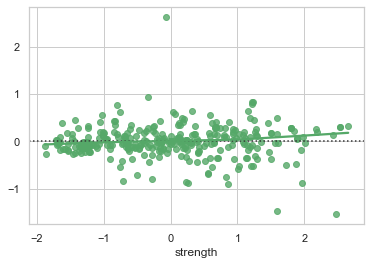

In [55]:
sns.residplot(Y_new_test, predictions, lowess=True, color="g")

### Hyperparamter Tuning using GridSearchCV - Bagging Regressor

In [56]:
scaler = StandardScaler().fit(X_new_train)
rescaledX = scaler.transform(X_new_train)
#param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
param_grid = {"n_estimators":np.array([50,100,200,300,400])}
model = BaggingRegressor()
kfold = KFold(n_splits=10, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_new_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Get the list of best estimators for Gradient Boost Regressor
grid.best_estimator_

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


-0.112654 (0.013184) with: {'n_estimators': 50}
-0.109409 (0.015526) with: {'n_estimators': 100}
-0.109895 (0.014454) with: {'n_estimators': 200}
-0.109031 (0.014967) with: {'n_estimators': 300}
-0.108267 (0.015344) with: {'n_estimators': 400}
Best: -0.108267 using {'n_estimators': 400}


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=400,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

### Fitting the Bagging Model with Best Hyperparameters for scaled data

In [57]:
scaler = StandardScaler().fit(X_new_train)
rescaled_X_train = scaler.transform(X_new_train)
model = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                         max_features=1.0, max_samples=1.0, n_estimators=400,
                         n_jobs=None, oob_score=False, random_state=None, verbose=0,
                         warm_start=False)
model.fit(rescaled_X_train, Y_new_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_new_test)
predictions = model.predict(rescaled_X_test)

print("Train Accuracy     : ",np.round(model.score(rescaled_X_train, Y_new_train),4))
print("Test Accuracy      : ",np.round(model.score(rescaled_X_test, Y_new_test),4))
print("Mean Squared Error : ", np.round(mean_squared_error(Y_new_test, predictions),4))

Train Accuracy     :  0.9791
Test Accuracy      :  0.8786
Mean Squared Error :  0.1273


### Use polynomial features of 5th degree instead of scaled data

In [58]:
#Obtain polynomial Features
poly_features = PolynomialFeatures(degree=5, interaction_only=True)
rescaled_X_train = poly_features.fit_transform(X_new_train)

model = BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                         max_features=1.0, max_samples=1.0, n_estimators=400,
                         n_jobs=None, oob_score=False, random_state=None, verbose=0,
                         warm_start=False)

model.fit(rescaled_X_train, Y_new_train)

# transform the validation dataset
rescaled_X_test = poly_features.transform(X_new_test)
predictions = model.predict(rescaled_X_test)

print("Train Accuracy     : ",np.round(model.score(rescaled_X_train, Y_new_train),4))
print("Test Accuracy      : ",np.round(model.score(rescaled_X_test, Y_new_test),4))
print("Mean Squared Error : ", np.round(mean_squared_error(Y_new_test, predictions),4))

Train Accuracy     :  0.9761
Test Accuracy      :  0.8644
Mean Squared Error :  0.1422


### Compare Actual and Predicted Data

In [59]:
diff = abs(Y_new_test - predictions)

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_new_test, 'Difference' : diff})
compare.head(10)

,Prediction,Test Data,Difference
339,0.271940,0.737921,0.465981
244,0.756525,0.799297,0.042771
882,-0.382637,-0.117685,0.264952
567,-0.755840,-1.054719,0.298880
923,-1.132035,-1.254645,0.122609
358,-0.555786,-0.651223,0.095437
576,0.528207,1.231353,0.703146
27,1.773249,1.796491,0.023242
994,-0.853583,-1.162886,0.309302
563,-0.273524,-0.611724,0.338201


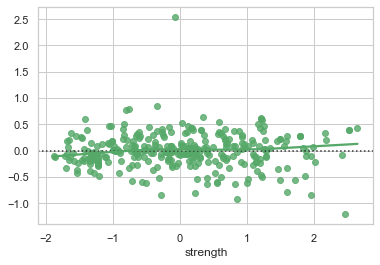

In [60]:
sns.residplot(Y_new_test, predictions, lowess=True, color="g")

## 4. Model Evaluation and Performance

### Model Performance Range at 95% confidence level - Bootstrap + Random Forest

In [61]:
# load values of the dataset
concrete_XY = X_new.join(y_new)
values = concrete_XY.values

# configure bootstrap
n_iterations = 1000
n_size = int(len(concrete_df_z) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = np.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = RandomForestRegressor(n_estimators=300)
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = model.score(test[:,:-1], test[:,-1])
	stats.append(score)


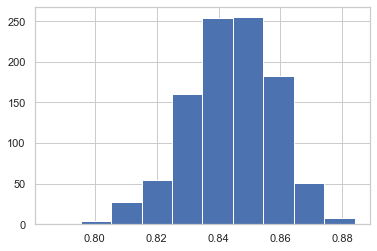

****************************************************************************
Model Performance Range at 95.0 confidence interval is 81.2% and 86.9%
****************************************************************************


In [62]:
# plot bootstrap scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('****************************************************************************')
print('Model Performance Range at %.1f confidence interval is %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
print('****************************************************************************')

### Model Performance Range at 95% confidence level - Bootstrap + Gradient Boosting Regressor

In [63]:
# load values of the dataset
concrete_XY = X_new.join(y_new)
values = concrete_XY.values

# configure bootstrap
n_iterations = 1000
n_size = int(len(concrete_df_z) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = np.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = GradientBoostingRegressor(n_estimators=400)
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = model.score(test[:,:-1], test[:,-1])
	stats.append(score)


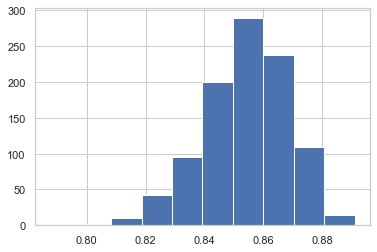

****************************************************************************
Model Performance Range at 95.0 confidence interval is 82.2% and 87.9%
****************************************************************************


In [64]:
# plot bootstrap scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('****************************************************************************')
print('Model Performance Range at %.1f confidence interval is %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
print('****************************************************************************')

### Model Performance Range at 95% confidence level - Bootstrap + Bagging Regressor

In [65]:
# load values of the dataset
concrete_XY = X_new.join(y_new)
values = concrete_XY.values

# configure bootstrap
n_iterations = 1000
n_size = int(len(concrete_df_z) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = np.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = BaggingRegressor(n_estimators=400)
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = model.score(test[:,:-1], test[:,-1])
	stats.append(score)


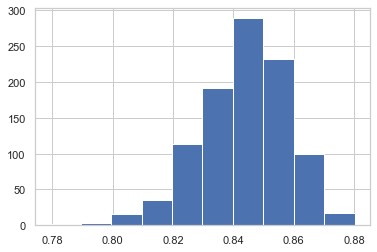

****************************************************************************
Model Performance Range at 95.0 confidence interval is 81.1% and 86.9%
****************************************************************************


In [66]:
# plot bootstrap scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('****************************************************************************')
print('Model Performance Range at %.1f confidence interval is %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
print('****************************************************************************')

## Model Evaluation - Checking if the model is underfit or overfit - Learning_curve

### Learning Curves for Random Forest Regressor
* Iteration 1 - Scaled Data of all features
* Iteration 2 - Scaled Data of selected features

**Iteration 1 - All Features**

In [67]:
# learning curve is used to estimate if we could benefit from adding more sample to the dataset
# Use original data

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator=RandomForestRegressor(n_estimators=300),
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1,
                                                        return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_mean = np.mean(fit_times, axis=1)
fit_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Performance of the model')

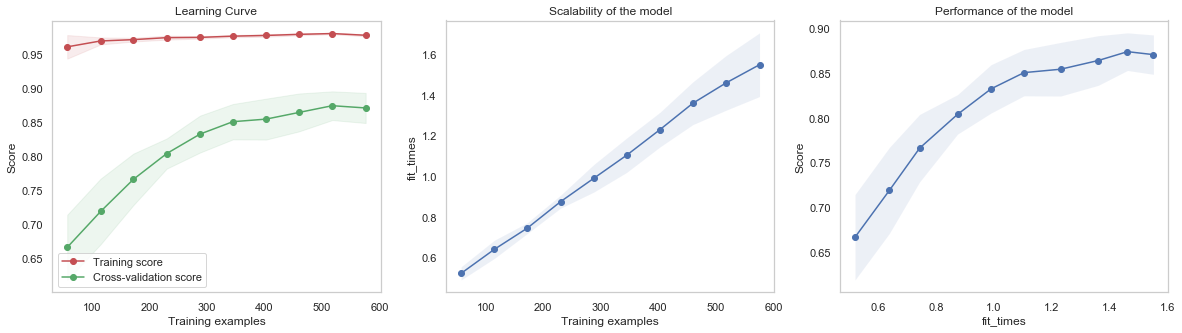

In [68]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
# Plot learning curve
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].grid()
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")                  
axes[0].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_mean, 'o-')
axes[1].fill_between(train_sizes, fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_mean, test_mean, 'o-')
axes[2].fill_between(fit_mean, test_mean - test_std, test_mean + test_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")


**Iteration 2 - Selective Features**

In [69]:
# learning curve is used to estimate if we could benefit from adding more sample to the dataset
# Use selective features

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator=RandomForestRegressor(n_estimators=300),
                                                        X=X_new_train,
                                                        y=Y_new_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1,
                                                        return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_mean = np.mean(fit_times, axis=1)
fit_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Performance of the model')

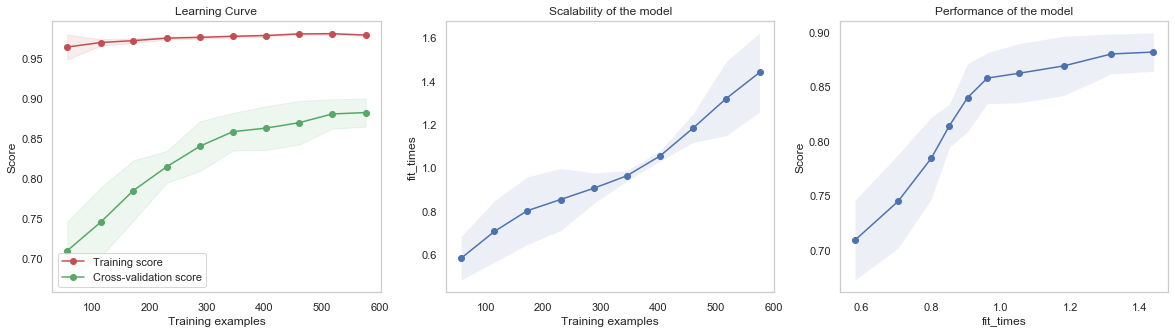

In [70]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
# Plot learning curve
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].grid()
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")                  
axes[0].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_mean, 'o-')
axes[1].fill_between(train_sizes, fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_mean, test_mean, 'o-')
axes[2].fill_between(fit_mean, test_mean - test_std, test_mean + test_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")


### Learning Curves for Gradient Boosting Regressor
* Iteration 1 - Scaled Data of all features
* Iteration 2 - Scaled Data of selected features

**Iteration 1 - All Features**

In [71]:
# learning curve is used to estimate if we could benefit from adding more sample to the dataset
# Use original data

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator=GradientBoostingRegressor(n_estimators=400),
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1,
                                                        return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_mean = np.mean(fit_times, axis=1)
fit_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Performance of the model')

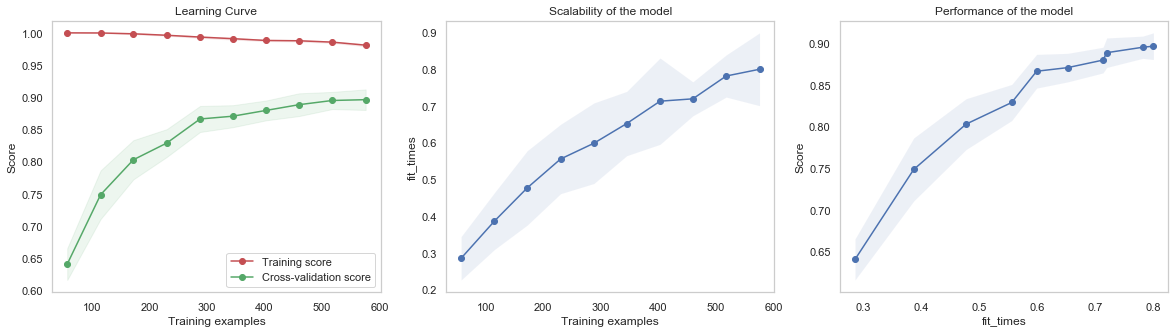

In [72]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
# Plot learning curve
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].grid()
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")                  
axes[0].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_mean, 'o-')
axes[1].fill_between(train_sizes, fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_mean, test_mean, 'o-')
axes[2].fill_between(fit_mean, test_mean - test_std, test_mean + test_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")


**Iteration 2 - Selective Features**

In [73]:
# learning curve is used to estimate if we could benefit from adding more sample to the dataset
# Use selective features

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator=GradientBoostingRegressor(n_estimators=400),
                                                        X=X_new_train,
                                                        y=Y_new_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1,
                                                        return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_mean = np.mean(fit_times, axis=1)
fit_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Performance of the model')

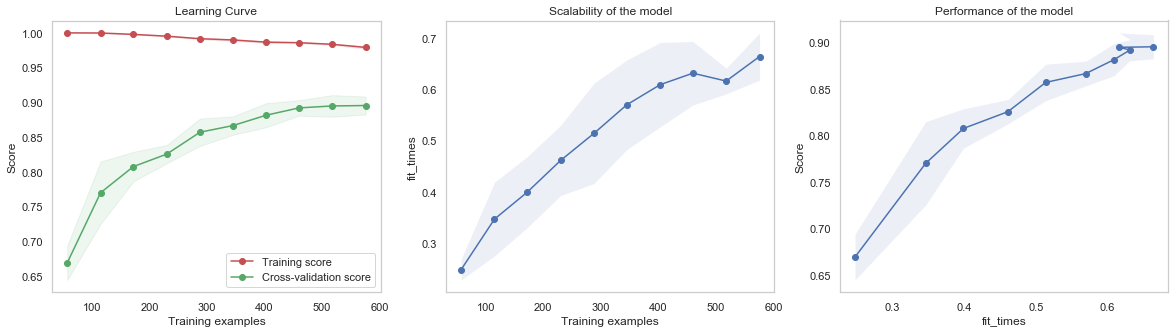

In [74]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
# Plot learning curve
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].grid()
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")                  
axes[0].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_mean, 'o-')
axes[1].fill_between(train_sizes, fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_mean, test_mean, 'o-')
axes[2].fill_between(fit_mean, test_mean - test_std, test_mean + test_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")


### Learning Curves for Bagging Regressor
* Iteration 1 - Scaled Data of all features
* Iteration 2 - Scaled Data of selected features

**Iteration 1 - All Features**

In [75]:
# learning curve is used to estimate if we could benefit from adding more sample to the dataset
# Use original data

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator=RandomForestRegressor(n_estimators=400),
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1,
                                                        return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_mean = np.mean(fit_times, axis=1)
fit_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Performance of the model')

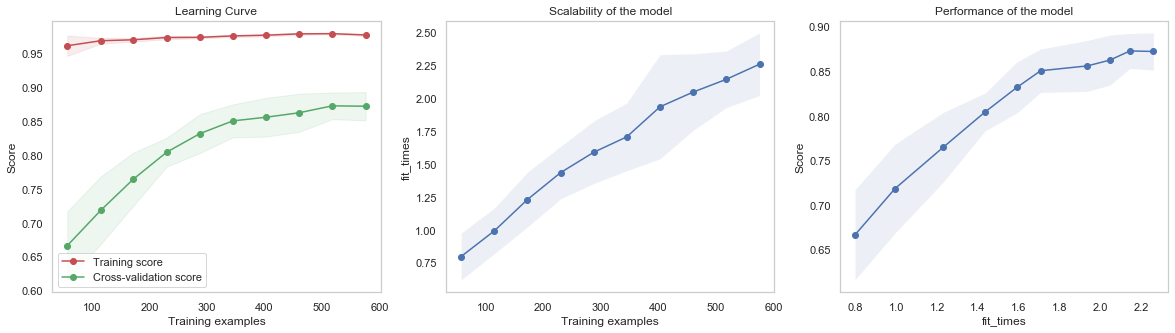

In [76]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
# Plot learning curve
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].grid()
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")                  
axes[0].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_mean, 'o-')
axes[1].fill_between(train_sizes, fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_mean, test_mean, 'o-')
axes[2].fill_between(fit_mean, test_mean - test_std, test_mean + test_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")


**Iteration 2 - Selective Features**

In [77]:
# learning curve is used to estimate if we could benefit from adding more sample to the dataset
# Use selective features

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator=RandomForestRegressor(n_estimators=400),
                                                        X=X_new_train,
                                                        y=Y_new_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1,
                                                        return_times=True)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_mean = np.mean(fit_times, axis=1)
fit_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Performance of the model')

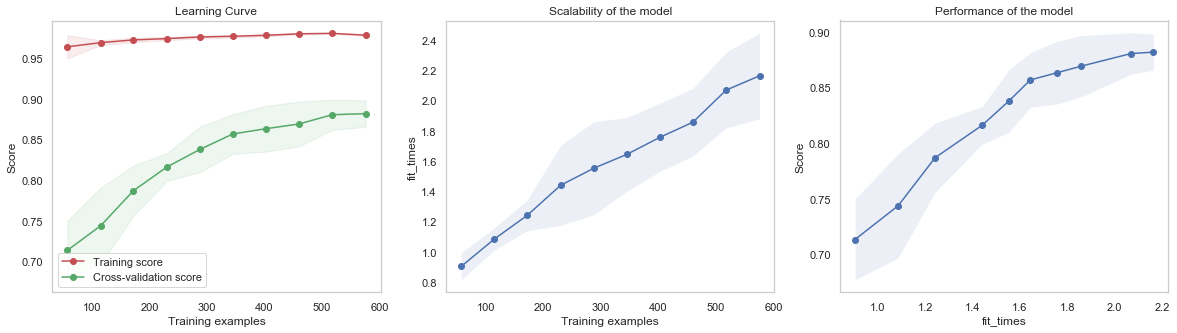

In [78]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
# Plot learning curve
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].grid()
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")                  
axes[0].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_mean, 'o-')
axes[1].fill_between(train_sizes, fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_mean, test_mean, 'o-')
axes[2].fill_between(fit_mean, test_mean - test_std, test_mean + test_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")


**Observation:** 

* Learning curves of random forest regressor show that the model is underfit since there is almost a constant gap between training and validation plots and could do better with more samples. These plots might converge when we have more data to train and validate. Also the scalability and performance could be improved. It takes around 1.4-1.6 fit time to reach a score of about 89%.

* Learning curves of gradient boosting regressor show that the model is almost in the right fit zone since the training and validation plots are about to converge. The model has a better scalability and performance compared to random forest. It takes around 0.6 to 0.8 fit time to reach a score of about 89%.

* Learning curves of bagging regressor show that the model is underfit since there is almost a constant gap between training and validation plots and could do better with more samples. These plots might converge when we have more data to train and validate. Also the scalability and performance could be improved. It takes around 2.2 fit time to reach a score of about 89%.


From the learning curves, we can see that **gradient boosting regressor** is better in terms of model fit, scalability, performance. It has a **Model Performance Range between 82.2% and 87.9%** at 95.0 confidence interval.